# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from google.colab import drive

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
#Type your code here
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/Dicoding BMLP/Sales.csv"

# Load dataset
df = pd.read_csv(file_path)

In [4]:
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**1. Memahami Struktur Data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [6]:
df.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


In [7]:
df.describe(include="object")

,Brands,Models,Colors,Memory,Storage,Camera,Mobile
count,3114,3114,3114,3071,3075,3114,3114
unique,17,914,639,26,26,1,928
top,SAMSUNG,iPhone 11,Black,4 GB,64 GB,Yes,Apple iPhone 11
freq,719,36,489,750,774,3114,36


- fitur kategorikal memiliki nilai unik yang sangat banyak, penyederhanan untuk beberapa nilai unik akan dilakukan.
- camera tidak memberikan informasi apapun karena smuanya hanya berisi YES

**2. Menangani Data yang Hilang**

In [70]:
# Cek jumlah missing values
print(df.isnull().sum())


Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64


**3. Analisis Distribusi dan Korelasi**

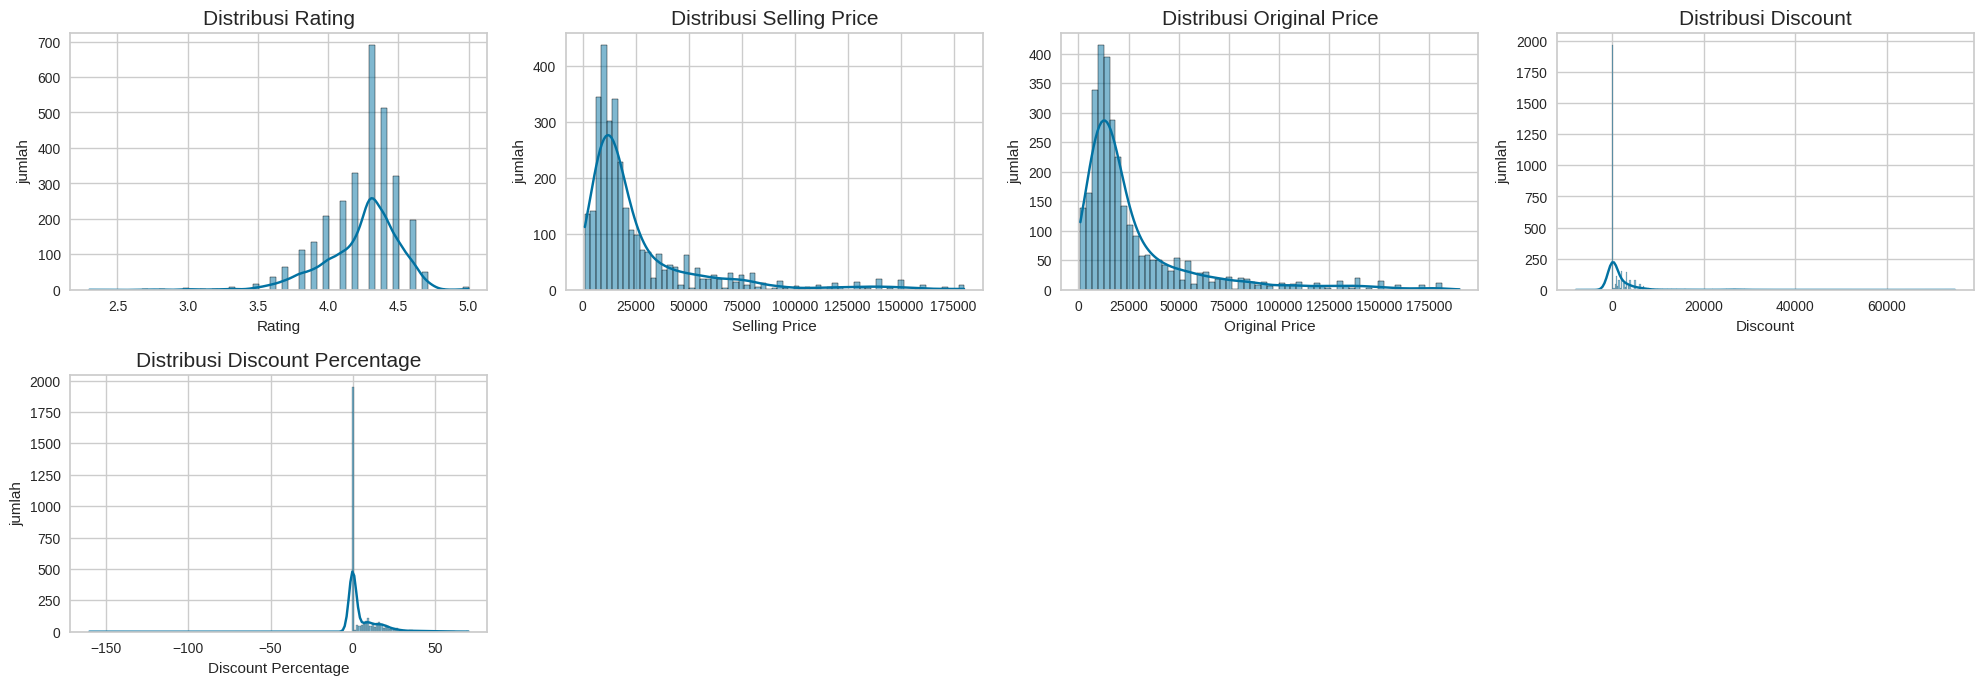

In [9]:
plt.figure(figsize=(20, 10))
# Menghilangkan kolom terakhir
for i, col in enumerate(df.select_dtypes(exclude='object').columns.tolist()[:]):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col.replace("_", " ").title()}', size=15)
    plt.xlabel(f'{col.replace("_", " ").title()}')
    plt.ylabel('jumlah')
plt.tight_layout()
plt.show()


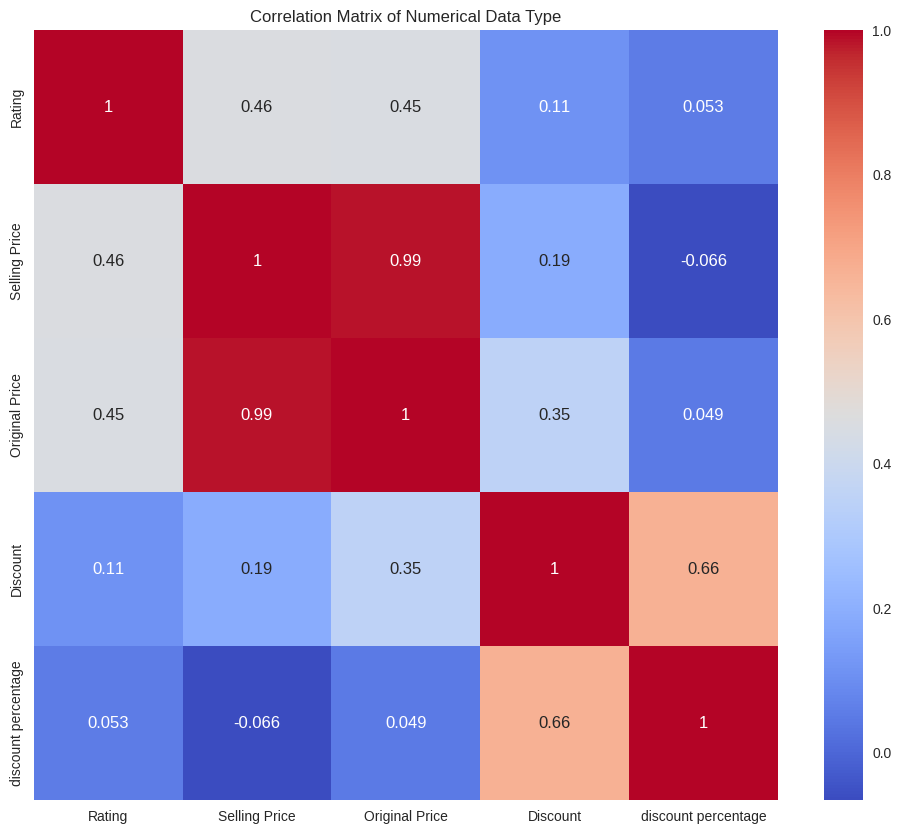

In [10]:
# Menghitung matriks korelasi
df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Data Type")
plt.show()

- discount, discount percentage serta selling price, original price memiliki korelasi yang tinggi satu sama lain, salah satu dari masing-masing pasangan akan di drop

4. **Visualisasi Data**  

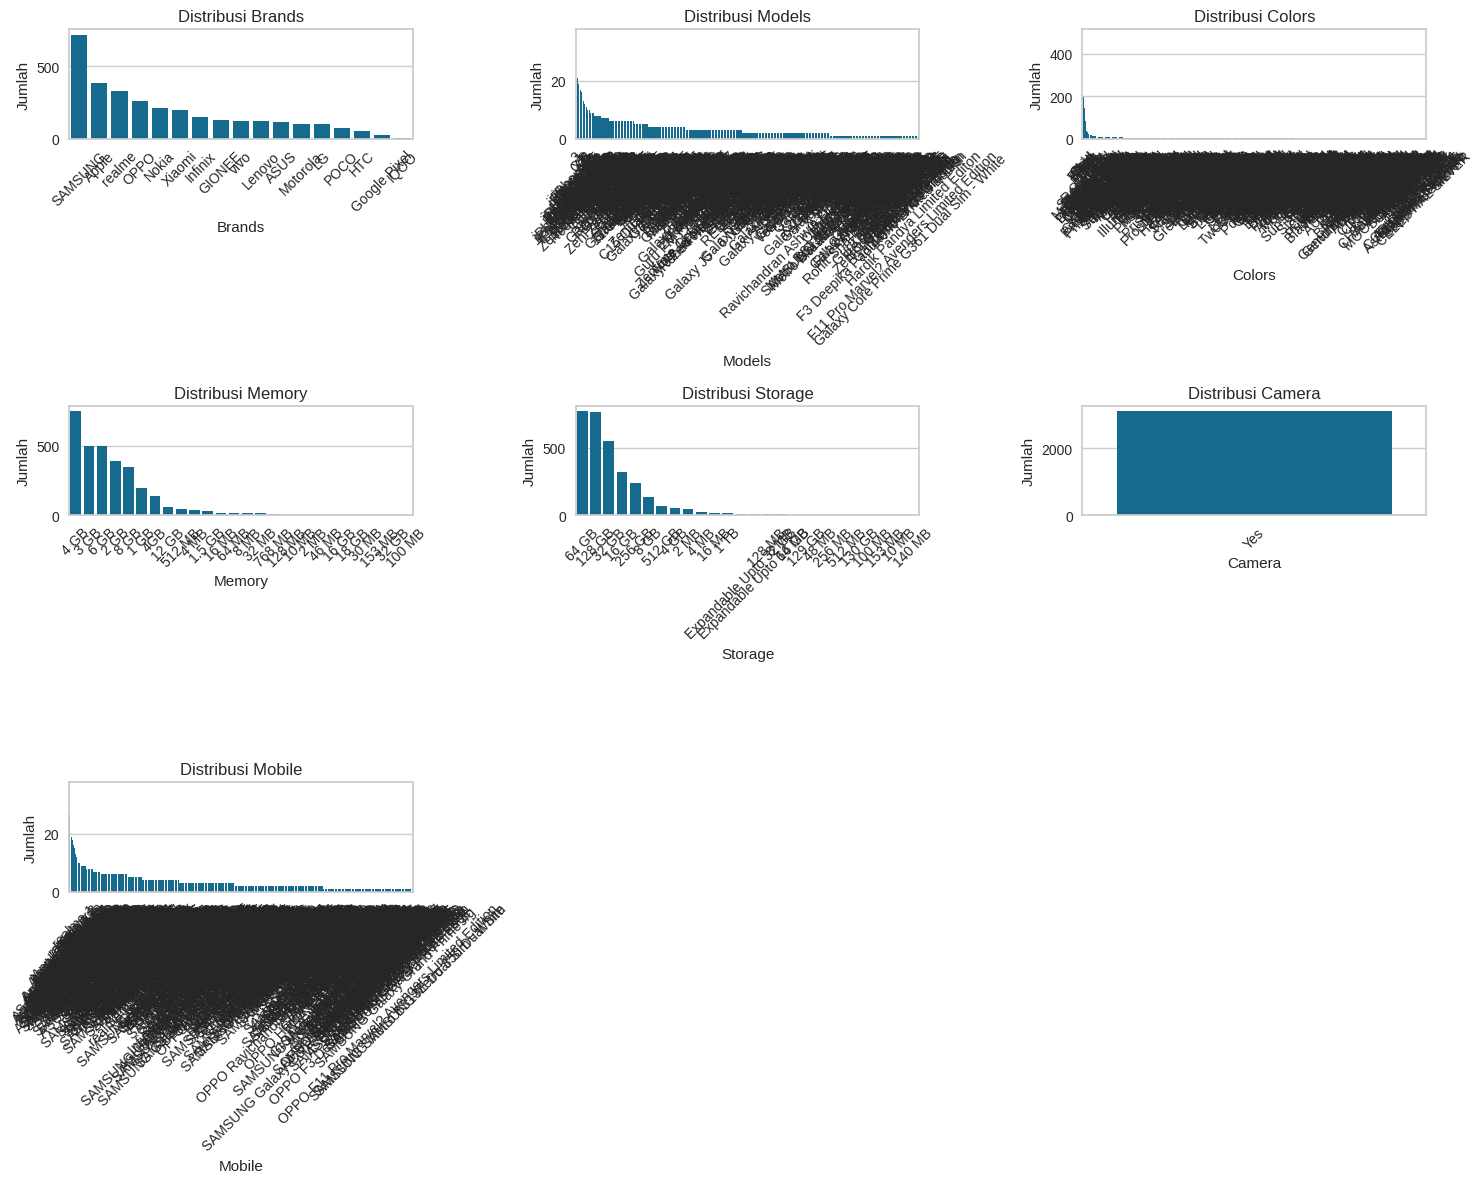

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil semua kolom kategorikal
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_plots = len(cat_cols)  # Hitung jumlah subplot

# Tentukan jumlah baris dan kolom otomatis
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Maks 3 kolom per baris
cols = min(3, num_plots)  # Maks 3 kolom

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(cat_cols):
    plt.subplot(rows, cols, i + 1)
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(f'Distribusi {col.replace("_", " ").title()}', size=12)
    plt.xlabel(f'{col.replace("_", " ").title()}')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)  # Rotasi label untuk keterbacaan

plt.tight_layout()
plt.show()


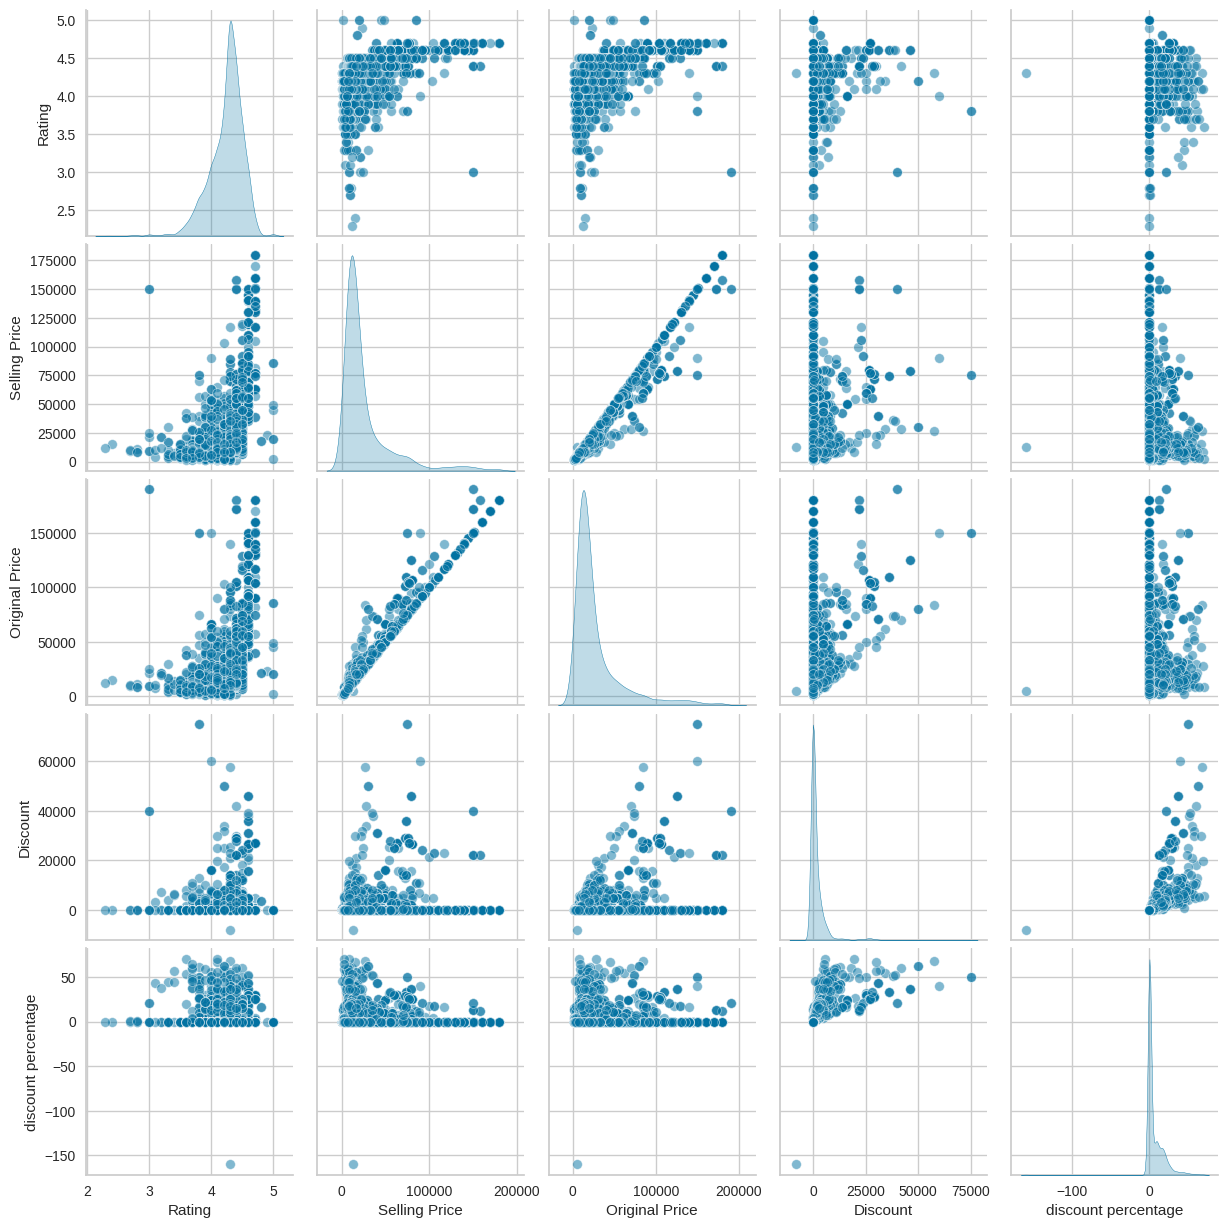

In [ ]:
numerical_columns = df.select_dtypes(exclude=['object']).columns

# Membuat pairplot untuk semua fitur numerik
sns.pairplot(df[numerical_columns], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [71]:
df_processed = df.copy()

**menangani missing value**

In [72]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [73]:
df_processed.dropna(inplace=True)


In [74]:
print(df_processed.isnull().sum())


Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64


**feature engineering**

*colors*

In [75]:
def categorize_colors(color):
    if 'Black' in color:
        return 'Black'
    elif 'White' in color:
        return 'White'
    elif 'Blue' in color:
        return 'Blue'
    elif 'Red' in color:
        return 'Red'
    elif 'Green' in color:
        return 'Green'
    elif 'Gold' in color or 'Yellow' in color:
        return 'Gold/Yellow'
    elif 'Silver' in color or 'Gray' in color:
        return 'Silver/Gray'
    else:
        return 'Other'

df_processed['Colors'] = df_processed['Colors'].apply(categorize_colors)
df_processed['Colors'].describe()
df_processed['Colors'].value_counts()

,count
Colors,
Black,830
Blue,508
Other,490
Gold/Yellow,307
White,306
Silver/Gray,188
Red,136
Green,132


*Type dengan acuan original price*

In [76]:
# Fungsi untuk menentukan segmen harga
def categorize_price(price):
    if price < 10000:
        return "Entry-level"
    elif 10000 <= price < 29000:
        return "Mid-range"
    elif 29000 <= price < 50000:
        return "Upper mid-range"
    else:
        return "Flagship"

# Tambahkan kolom
df_processed["Type"] = df["Original Price"].apply(categorize_price)

df_processed[["Mobile", "Original Price", "Type"]].head(10)


,Mobile,Original Price,Type
0,SAMSUNG GALAXY M31S,20999,Mid-range
1,Nokia 3.2,10199,Mid-range
3,Infinix Note 5,12999,Mid-range
4,Apple iPhone 11,49900,Upper mid-range
5,GIONEE L800,2199,Entry-level
7,Apple iPhone XR,47900,Upper mid-range
8,SAMSUNG Galaxy E5,20400,Mid-range
9,Xiaomi Redmi Note 11T 5G,22999,Mid-range
10,SAMSUNG Galaxy A12,11989,Mid-range
11,Apple iPhone 11,64900,Flagship


In [77]:
df_processed.drop(columns=["Mobile", "Models"], inplace=True)
df_processed.head()

,Brands,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Discount,discount percentage,Type
0,SAMSUNG,Black,8 GB,128 GB,Yes,4.3,19330,20999,1669,7.947998,Mid-range
1,Nokia,Other,2 GB,16 GB,Yes,3.8,10199,10199,0,0.000000,Mid-range
3,Infinix,Blue,4 GB,64 GB,Yes,4.2,12999,12999,0,0.000000,Mid-range
4,Apple,Black,4GB,64 GB,Yes,4.6,49900,49900,0,0.000000,Upper mid-range
5,GIONEE,Black,8 MB,16 MB,Yes,4.0,2199,2199,0,0.000000,Entry-level


In [78]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2897 entries, 0 to 3113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               2897 non-null   object 
 1   Colors               2897 non-null   object 
 2   Memory               2897 non-null   object 
 3   Storage              2897 non-null   object 
 4   Camera               2897 non-null   object 
 5   Rating               2897 non-null   float64
 6   Selling Price        2897 non-null   int64  
 7   Original Price       2897 non-null   int64  
 8   Discount             2897 non-null   int64  
 9   discount percentage  2897 non-null   float64
 10  Type                 2897 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 271.6+ KB


- mobile dan model dapat di drop karena 2 fitur ini memiliki nilai unik yang terlalu banyak.

- dengan adanya fitur type, ini dapat menyederhanakan nilai unik tanpa merubah data

*drop data dengan korelasi tinggi/low variants*

In [79]:
df_processed.drop(columns=['Camera',"discount percentage","Original Price"], inplace=True)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2897 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brands         2897 non-null   object 
 1   Colors         2897 non-null   object 
 2   Memory         2897 non-null   object 
 3   Storage        2897 non-null   object 
 4   Rating         2897 non-null   float64
 5   Selling Price  2897 non-null   int64  
 6   Discount       2897 non-null   int64  
 7   Type           2897 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 203.7+ KB


In [80]:
df_processed.head()

,Brands,Colors,Memory,Storage,Rating,Selling Price,Discount,Type
0,SAMSUNG,Black,8 GB,128 GB,4.3,19330,1669,Mid-range
1,Nokia,Other,2 GB,16 GB,3.8,10199,0,Mid-range
3,Infinix,Blue,4 GB,64 GB,4.2,12999,0,Mid-range
4,Apple,Black,4GB,64 GB,4.6,49900,0,Upper mid-range
5,GIONEE,Black,8 MB,16 MB,4.0,2199,0,Entry-level


*memory dan storage*

memory dan storage akan dirubah menjadi numeri. hal ini bertujuan unutk memberikan informasi yang lebih baik pada saat clustering nantinya

In [81]:
print("Nilai unik Memory:\n", df_processed["Memory"].unique())
print("\nNilai unik Storage:\n", df_processed["Storage"].unique())


Nilai unik Memory:
 ['8 GB' '2 GB' '4 GB' '4GB' '8 MB' '3 GB' '1.5 GB' '6 GB' '1 GB' '2 MB'
 '512 MB' '12 GB' '768 MB' '10 MB' '32 MB' '4 MB' '16 MB' '64 MB' '128 MB'
 '153 MB' '30 MB' '46 MB' '100 MB' '16 GB']

Nilai unik Storage:
 ['128 GB' '16 GB' '64 GB' '16 MB' '256 GB' '32 GB' '8 GB' '512 GB' '2 MB'
 '4 GB' 'Expandable Upto 16 GB' '64 MB' 'Expandable Upto 32 GB' '4 MB'
 '128 MB' '1 TB' '512 MB' '129 GB' '256 MB' '153 MB' '130 GB' '8 MB'
 '10 MB' '100 MB' '140 MB']


In [82]:
import re  # Untuk ekstrak angka dari teks

def convert_to_mb(value):
    if isinstance(value, str):  # Pastikan nilai berupa string
        value = value.upper().replace(" ", "")  # Hapus spasi & normalisasi huruf besar

        match = re.search(r"([\d\.]+)(GB|MB|TB)", value)

        if match:
            num = float(match.group(1))  # Ambil angka
            unit = match.group(2)  # Ambil satuan

            # Konversi ke MB
            if unit == "GB":
                return num * 1024  # 1 GB = 1024 MB
            elif unit == "TB":
                return num * 1024 * 1024  # 1 TB = 1024 * 1024 MB
            elif unit == "MB":
                return num  # Sudah dalam MB

    return None

# Terapkan konversi
df_processed["Memory_MB"] = df["Memory"].apply(convert_to_mb)
df_processed["Storage_MB"] = df["Storage"].apply(convert_to_mb)

# Cek hasil setelah konversi
print(df_processed[["Memory", "Memory_MB", "Storage", "Storage_MB"]].head(10))


    Memory  Memory_MB Storage  Storage_MB
0     8 GB     8192.0  128 GB    131072.0
1     2 GB     2048.0   16 GB     16384.0
3     4 GB     4096.0   64 GB     65536.0
4      4GB     4096.0   64 GB     65536.0
5     8 MB        8.0   16 MB        16.0
7     3 GB     3072.0   64 GB     65536.0
8   1.5 GB     1536.0   16 GB     16384.0
9     8 GB     8192.0  128 GB    131072.0
10    4 GB     4096.0   64 GB     65536.0
11     4GB     4096.0  256 GB    262144.0


In [83]:
df_processed.drop(columns=["Memory", "Storage"], inplace=True)

In [84]:
print(df_processed[["Memory_MB", "Storage_MB"]].isnull().sum())

Memory_MB     0
Storage_MB    0
dtype: int64


In [85]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2897 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brands         2897 non-null   object 
 1   Colors         2897 non-null   object 
 2   Rating         2897 non-null   float64
 3   Selling Price  2897 non-null   int64  
 4   Discount       2897 non-null   int64  
 5   Type           2897 non-null   object 
 6   Memory_MB      2897 non-null   float64
 7   Storage_MB     2897 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 203.7+ KB


In [86]:
df_processed.describe()

,Rating,Selling Price,Discount,Memory_MB,Storage_MB
count,2897.000000,2897.000000,2897.000000,2897.000000,2.897000e+03
mean,4.241319,24692.492233,1964.185709,4170.691405,8.760485e+04
std,0.272841,26373.592602,5505.394873,2475.611668,9.633680e+04
min,2.300000,1000.000000,-8000.000000,2.000000,2.000000e+00
25%,4.100000,9990.000000,0.000000,2048.000000,3.276800e+04
50%,4.300000,14999.000000,0.000000,4096.000000,6.553600e+04
75%,4.400000,27499.000000,2000.000000,6144.000000,1.310720e+05
max,5.000000,179900.000000,75000.000000,16384.000000,1.048576e+06


In [87]:
df_processed.describe(include="object")

,Brands,Colors,Type
count,2897,2897,2897
unique,17,8,4
top,SAMSUNG,Black,Mid-range
freq,685,830,1417


**menangani duplikat**

In [88]:
duplicate_count = df_processed.duplicated().sum()
print(f"Jumlah Data Duplikat: {duplicate_count}")

Jumlah Data Duplikat: 207


In [89]:
df_processed[df_processed.duplicated(keep=False)].sort_values(by=df_processed.columns.tolist()).head(20)


,Brands,Colors,Rating,Selling Price,Discount,Type,Memory_MB,Storage_MB
797,ASUS,Black,4.3,43999,0,Upper mid-range,8192.0,262144.0
1519,ASUS,Black,4.3,43999,0,Upper mid-range,8192.0,262144.0
130,ASUS,Blue,4.3,15599,0,Mid-range,4096.0,65536.0
2452,ASUS,Blue,4.3,15599,0,Mid-range,4096.0,65536.0
948,ASUS,Other,4.0,17999,0,Mid-range,3072.0,32768.0
3029,ASUS,Other,4.0,17999,0,Mid-range,3072.0,32768.0
1927,Apple,Black,4.5,24999,6501,Upper mid-range,2048.0,32768.0
2380,Apple,Black,4.5,24999,6501,Upper mid-range,2048.0,32768.0
2437,Apple,Black,4.5,24999,6501,Upper mid-range,2048.0,32768.0
2938,Apple,Black,4.5,24999,6501,Upper mid-range,2048.0,32768.0


In [90]:
df_processed.drop_duplicates(inplace= True)

In [91]:
duplicate_count = df_processed.duplicated().sum()
print(f"Jumlah Data Duplikat: {duplicate_count}")

Jumlah Data Duplikat: 0


In [92]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2690 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brands         2690 non-null   object 
 1   Colors         2690 non-null   object 
 2   Rating         2690 non-null   float64
 3   Selling Price  2690 non-null   int64  
 4   Discount       2690 non-null   int64  
 5   Type           2690 non-null   object 
 6   Memory_MB      2690 non-null   float64
 7   Storage_MB     2690 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 189.1+ KB


**deteksi outlier**

In [93]:
num_cols = df_processed.select_dtypes(exclude=['object']).columns

Q1 = df_processed[num_cols].quantile(0.25)
Q3 = df_processed[num_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((df_processed[num_cols] < (Q1 - 1.5 * IQR)) | (df_processed[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_count = outlier_condition.sum()

print(f"Jumlah Outlier: {outlier_count}")

Jumlah Outlier: 544


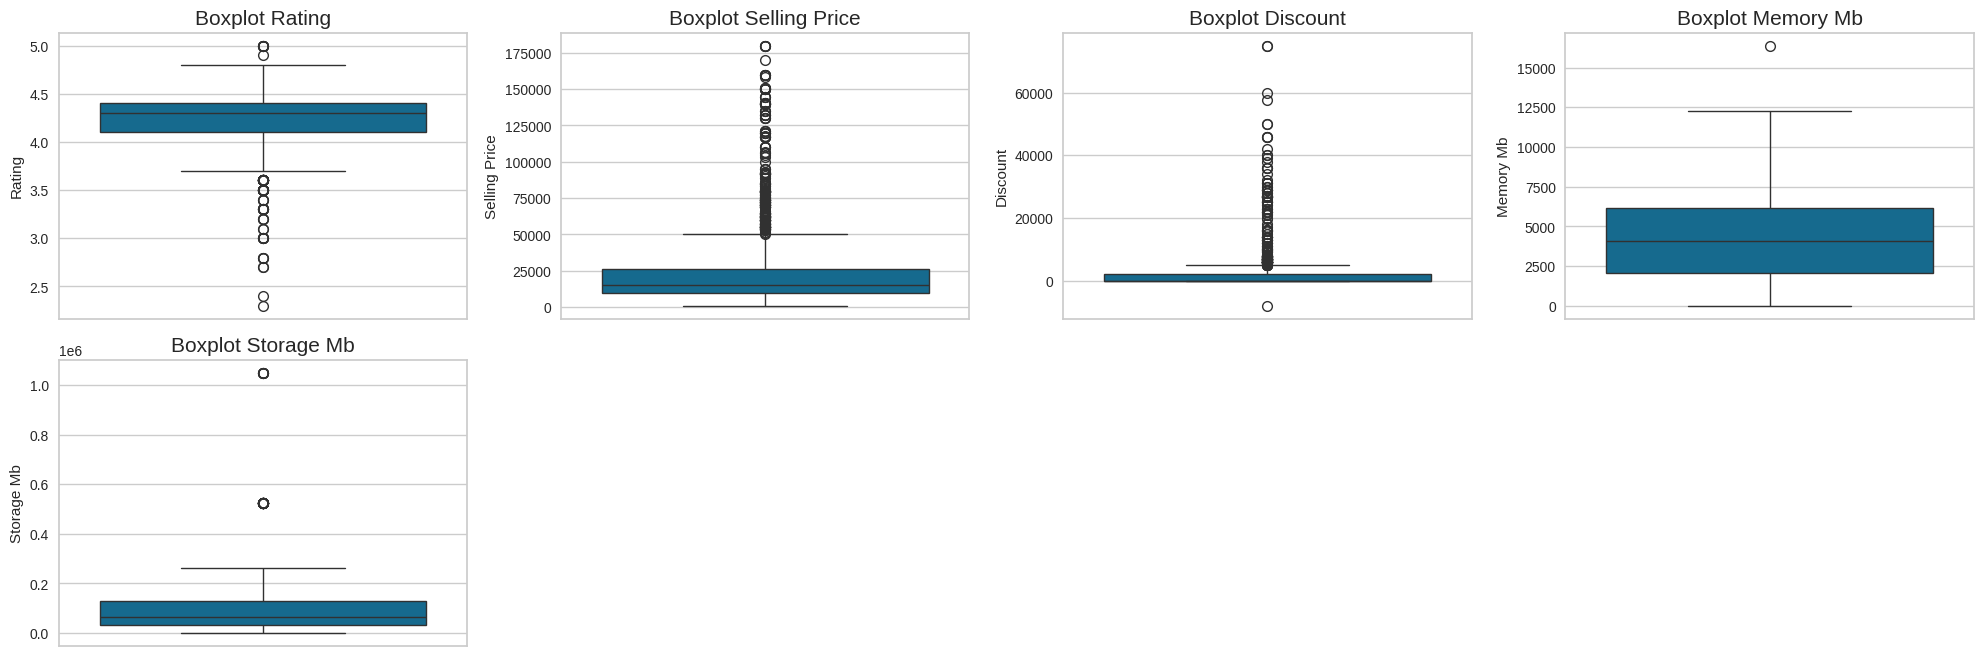

In [94]:
num_cols = df_processed.select_dtypes(exclude=['object']).columns.tolist()

plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df_processed[col])
    plt.title(f'Boxplot {col.replace("_", " ").title()}', size=15)
    plt.ylabel(col.replace("_", " ").title())

plt.tight_layout()
plt.show()


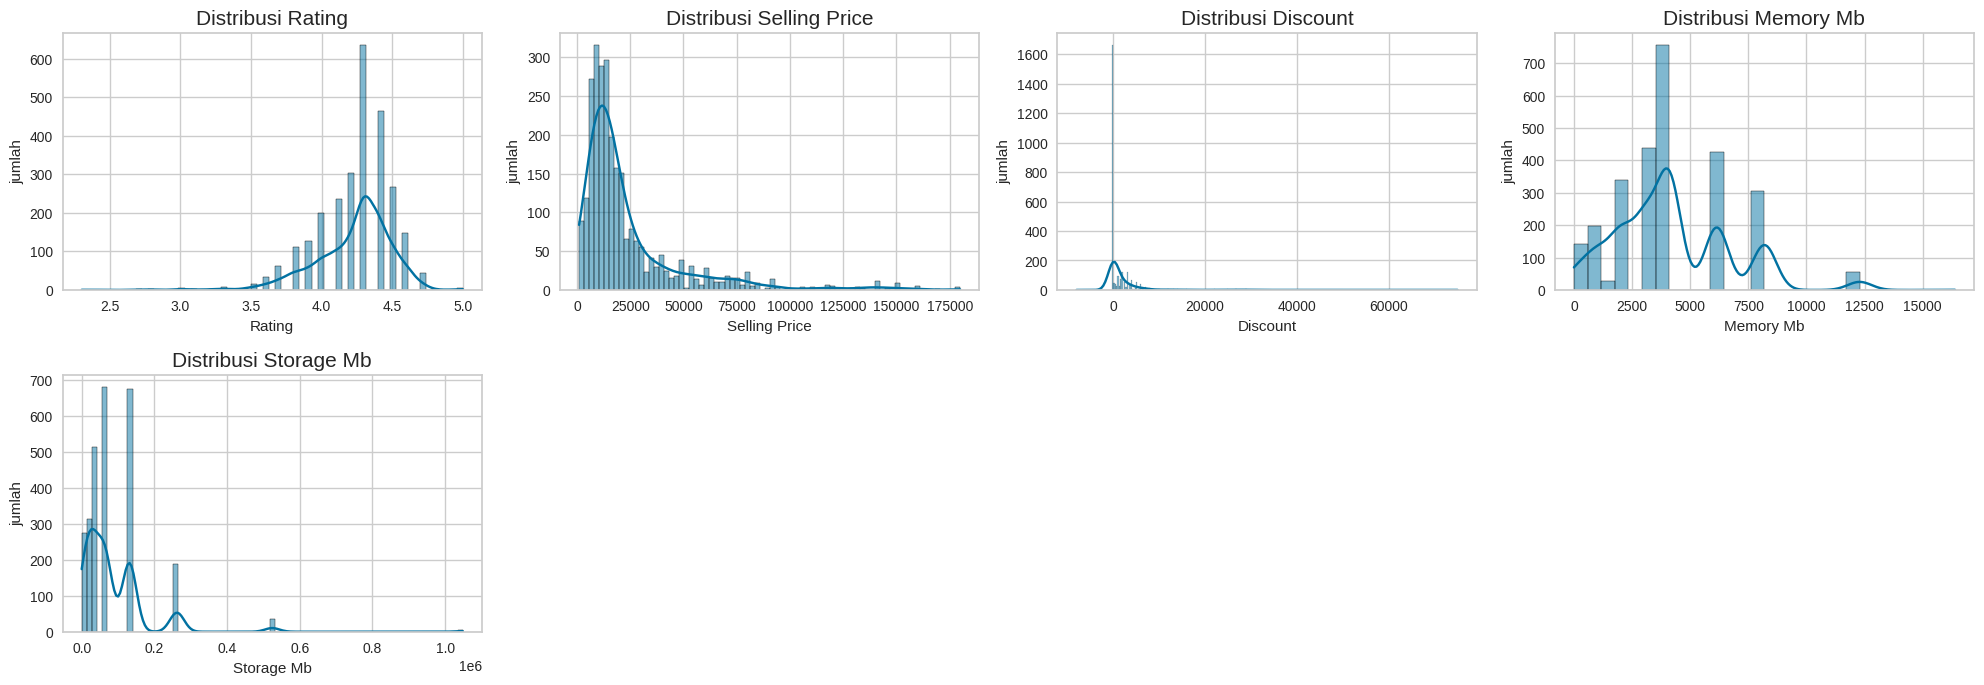

In [ ]:
plt.figure(figsize=(20, 10))
# Menghilangkan kolom terakhir
for i, col in enumerate(df_processed.select_dtypes(exclude='object').columns.tolist()[:]):
    plt.subplot(3, 4, i+1)
    sns.histplot(df_processed[col], kde=True)
    plt.title(f'Distribusi {col.replace("_", " ").title()}', size=15)
    plt.xlabel(f'{col.replace("_", " ").title()}')
    plt.ylabel('jumlah')
plt.tight_layout()
plt.show()


**menanganin outlier**

In [95]:
filtered_df = df_processed[~outlier_condition]

In [96]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2146 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brands         2146 non-null   object 
 1   Colors         2146 non-null   object 
 2   Rating         2146 non-null   float64
 3   Selling Price  2146 non-null   int64  
 4   Discount       2146 non-null   int64  
 5   Type           2146 non-null   object 
 6   Memory_MB      2146 non-null   float64
 7   Storage_MB     2146 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 150.9+ KB


In [97]:
filtered_df.describe()

,Rating,Selling Price,Discount,Memory_MB,Storage_MB
count,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000
mean,4.217148,16012.314073,790.163560,3955.439422,66462.811277
std,0.211189,10144.734759,1336.943992,2346.643923,56373.596949
min,3.700000,1000.000000,0.000000,2.000000,2.000000
25%,4.100000,8999.000000,0.000000,2048.000000,32768.000000
50%,4.300000,13500.000000,0.000000,4096.000000,65536.000000
75%,4.400000,19990.000000,1218.500000,6144.000000,131072.000000
max,4.800000,50000.000000,5000.000000,12288.000000,262144.000000


In [98]:
filtered_df.describe(include="object")

,Brands,Colors,Type
count,2146,2146,2146
unique,17,8,4
top,SAMSUNG,Black,Mid-range
freq,507,659,1244


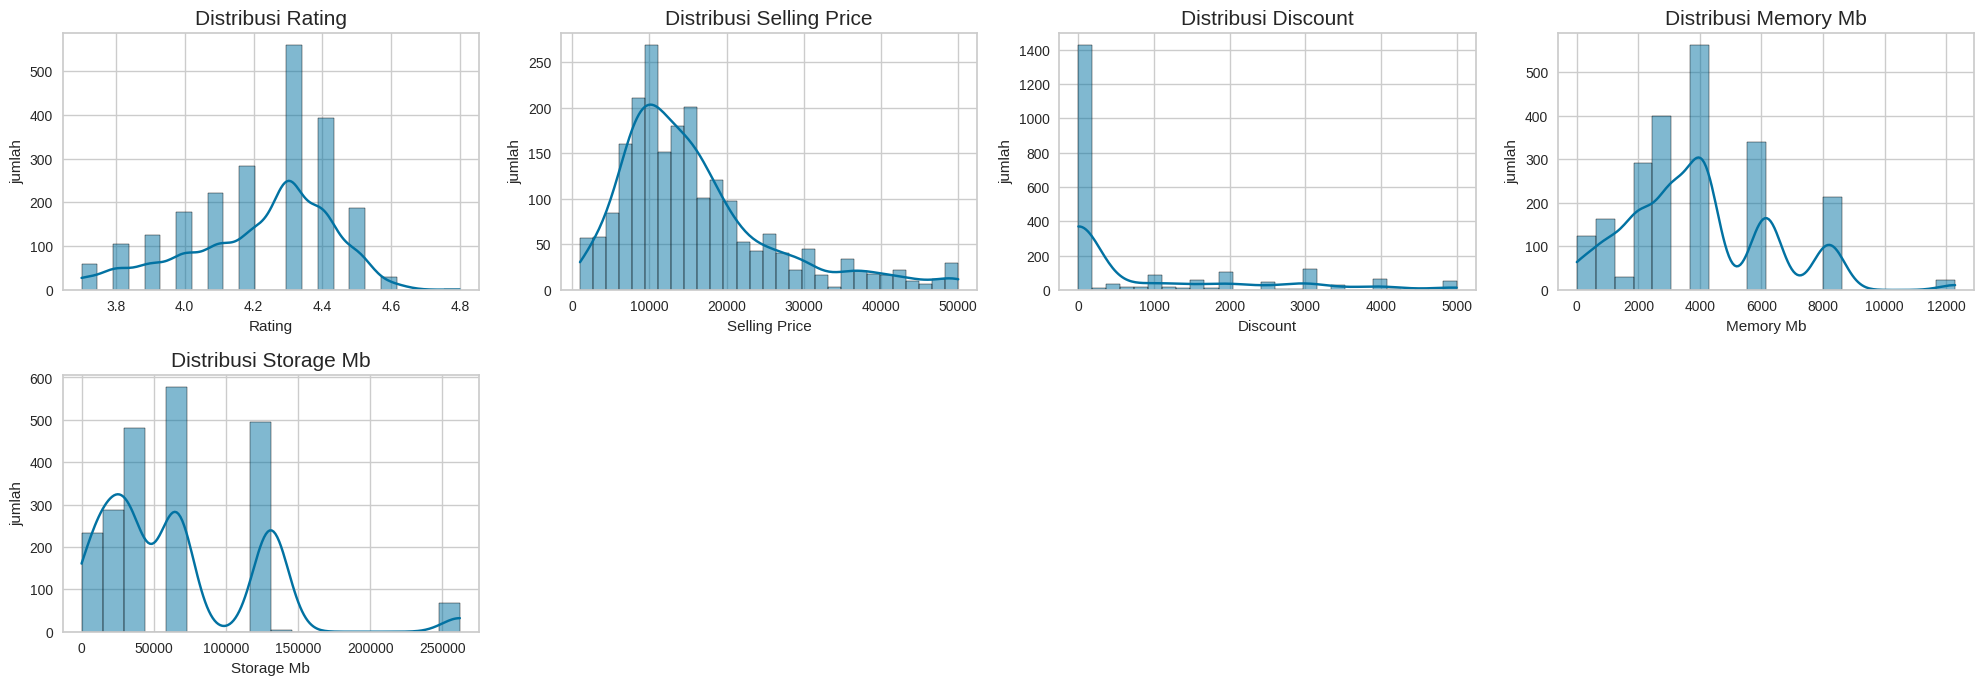

In [40]:
plt.figure(figsize=(20, 10))
# Menghilangkan kolom terakhir
for i, col in enumerate(filtered_df.select_dtypes(exclude='object').columns.tolist()[:]):
    plt.subplot(3, 4, i+1)
    sns.histplot(filtered_df[col], kde=True)
    plt.title(f'Distribusi {col.replace("_", " ").title()}', size=15)
    plt.xlabel(f'{col.replace("_", " ").title()}')
    plt.ylabel('jumlah')
plt.tight_layout()
plt.show()


**Scaling dan encoding**

In [290]:
df_final = filtered_df.copy()

*Encoding*

In [291]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler

# Inisialisasi encoder
label_encoders = {}

# Daftar kolom kategorikal
cat_cols = ["Brands", "Colors", "Type"]

for col in cat_cols:
    le = LabelEncoder()
    df_final.loc[:, col] = le.fit_transform(df_final[col])  # Encoding dengan .loc
    label_encoders[col] = le

# Cek hasil Label Encoding
print(df_final.head())

  Brands Colors  Rating  Selling Price  Discount Type  Memory_MB  Storage_MB
0     13      0     4.3          19330      1669    2     8192.0    131072.0
1     10      4     3.8          10199         0    2     2048.0     16384.0
3      6      1     4.2          12999         0    2     4096.0     65536.0
4      1      0     4.6          49900         0    3     4096.0     65536.0
5      2      0     4.0           2199         0    0        8.0        16.0


*Scaling*

In [292]:
# Inisialisasi scaler
minmax_scaler = MinMaxScaler()

# Kolom yang akan dinormalisasi
normalization_cols = ["Selling Price", "Discount", "Memory_MB", "Storage_MB", "Rating"]

df_final[normalization_cols] = df_final[normalization_cols].astype(float)

# Lakukan normalisasi menggunakan MinMaxScaler
df_final[normalization_cols] = minmax_scaler.fit_transform(df_final[normalization_cols])

# Cek hasil normalisasi
print(df_final.describe())

            Rating  Selling Price     Discount    Memory_MB   Storage_MB
count  2146.000000    2146.000000  2146.000000  2146.000000  2146.000000
mean      0.470135       0.306374     0.158033     0.321784     0.253530
std       0.191990       0.207035     0.267389     0.191001     0.215050
min       0.000000       0.000000     0.000000     0.000000     0.000000
25%       0.363636       0.163245     0.000000     0.166531     0.124993
50%       0.545455       0.255102     0.000000     0.333225     0.249994
75%       0.636364       0.387551     0.243700     0.499919     0.499996
max       1.000000       1.000000     1.000000     1.000000     1.000000


In [293]:
df_final.head()

,Brands,Colors,Rating,Selling Price,Discount,Type,Memory_MB,Storage_MB
0,13,0,0.545455,0.374082,0.3338,2,0.666612,0.499996
1,10,4,0.090909,0.187735,0.0000,2,0.166531,0.062493
3,6,1,0.454545,0.244878,0.0000,2,0.333225,0.249994
4,1,0,0.818182,0.997959,0.0000,3,0.333225,0.249994
5,2,0,0.272727,0.024469,0.0000,0,0.000488,0.000053


In [294]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2146 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brands         2146 non-null   object 
 1   Colors         2146 non-null   object 
 2   Rating         2146 non-null   float64
 3   Selling Price  2146 non-null   float64
 4   Discount       2146 non-null   float64
 5   Type           2146 non-null   object 
 6   Memory_MB      2146 non-null   float64
 7   Storage_MB     2146 non-null   float64
dtypes: float64(5), object(3)
memory usage: 215.4+ KB


In [301]:
df_norm = df_final.copy()

*reduksi dimensi*

In [249]:
df_model = df_final.copy()

In [250]:
df_model.head()

,Brands,Colors,Rating,Selling Price,Discount,Type,Memory_MB,Storage_MB
0,13,0,0.545455,0.374082,0.3338,2,0.666612,0.499996
1,10,4,0.090909,0.187735,0.0000,2,0.166531,0.062493
3,6,1,0.454545,0.244878,0.0000,2,0.333225,0.249994
4,1,0,0.818182,0.997959,0.0000,3,0.333225,0.249994
5,2,0,0.272727,0.024469,0.0000,0,0.000488,0.000053


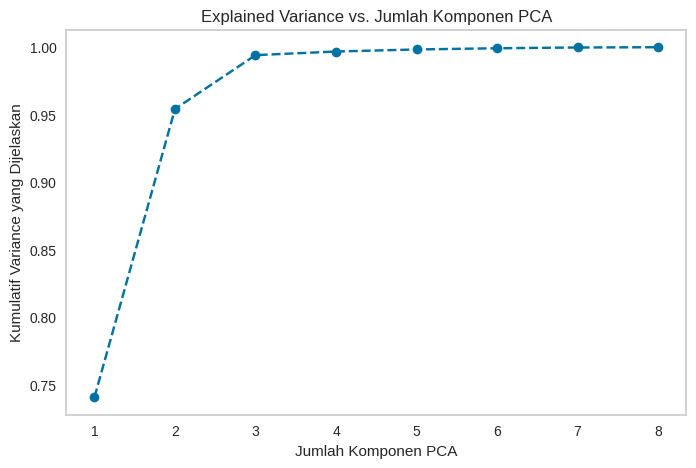

array([0.74080961, 0.95427454, 0.99413607, 0.99682364, 0.99833525,
       0.99923357, 0.9998028 , 1.        ])

In [251]:
from sklearn.decomposition import PCA
# PCA
pca = PCA()
pca.fit(df_model)

# Variance explained oleh setiap komponen
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot variansi yang dijelaskan oleh tiap komponen
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Jumlah Komponen PCA")
plt.ylabel("Kumulatif Variance yang Dijelaskan")
plt.title("Explained Variance vs. Jumlah Komponen PCA")
plt.grid()
plt.show()

# Menampilkan explained variance ratio
explained_variance

In [252]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_model)

# Cek hasil PCA
print(df_pca[:5])


[[ 2.73597761 -2.24372949]
 [-0.49933118  1.57689565]
 [-4.31253664 -1.62166972]
 [-9.19564762 -2.81920453]
 [-8.34250642 -2.94283447]]


In [253]:
# Variance yang dijelaskan oleh setiap komponen
explained_variance = pca.explained_variance_ratio_

print("Variance yang dijelaskan oleh setiap komponen:", explained_variance)

# Kumulatif variance yang dijelaskan
cumulative_variance = np.cumsum(explained_variance)
print("Kumulatif Variance yang Dijelaskan:", cumulative_variance)

Variance yang dijelaskan oleh setiap komponen: [0.74080961 0.21346492]
Kumulatif Variance yang Dijelaskan: [0.74080961 0.95427454]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [254]:
# Inisialisasi model KMeans
kmeans = KMeans(random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

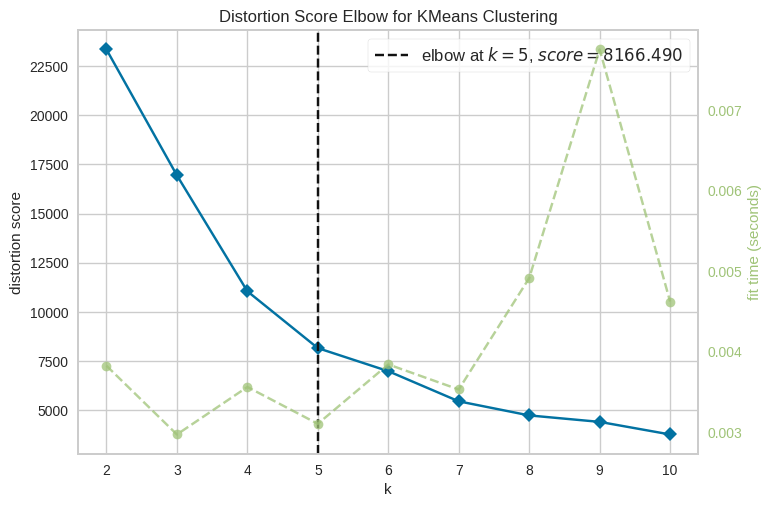

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [275]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Inisialisasi visualizer dengan model KMeans dan jumlah cluster maksimum
visualizer = KElbowVisualizer(kmeans, k=(2, 11))

# Visualisasi metode Elbow
visualizer.fit(df_pca)
visualizer.show()


In [272]:
optimal_clusters = visualizer.elbow_value_
print(f'Jumlah Cluster Optimal berdasarkan Elbow: {optimal_clusters}')

Jumlah Cluster Optimal berdasarkan Elbow: 5


In [273]:
kmeans_optimal_ori = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal_ori.fit(df_pca)

# Hitung Silhouette Score untuk mengevaluasi kualitas clustering
sil_score = silhouette_score(df_pca, kmeans_optimal_ori.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.48241376479641496


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [258]:
df_selected = df_final.copy()

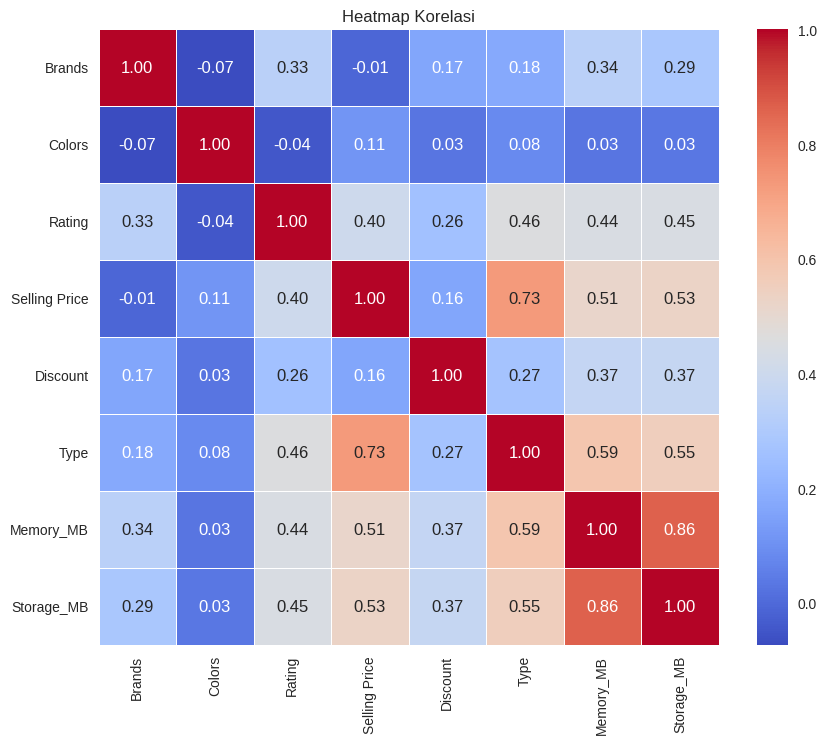

Pasangan fitur yang memiliki korelasi lebih dari 0.7: [('Type', 'Selling Price'), ('Storage_MB', 'Memory_MB')]


In [259]:
#Menghitung korelasi antar fitur
correlation_matrix = df_selected.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi")
plt.show()

# Menentukan ambang batas korelasi
threshold = 0.7

# Mengidentifikasi pasangan fitur yang memiliki korelasi lebih dari threshold
correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Menampilkan pasangan fitur yang memiliki korelasi lebih dari threshold
print(f"Pasangan fitur yang memiliki korelasi lebih dari {threshold}:", correlated_pairs)

In [260]:
# Menentukan fitur yang akan dihapus
columns_to_drop = set()
for pair in correlated_pairs:
    columns_to_drop.add(pair[1])

# Menghapus fitur dengan korelasi tinggi
df_final_dropped = df_selected.drop(columns=columns_to_drop)

# Menampilkan hasil setelah fitur dihapus
print(f"Fitur yang dihapus: {columns_to_drop}")
print(f"DataFrame setelah penghapusan fitur: \n{df_final_dropped.head()}")

Fitur yang dihapus: {'Selling Price', 'Memory_MB'}
DataFrame setelah penghapusan fitur: 
  Brands Colors    Rating  Discount Type  Storage_MB
0     13      0  0.545455    0.3338    2    0.499996
1     10      4  0.090909    0.0000    2    0.062493
3      6      1  0.454545    0.0000    2    0.249994
4      1      0  0.818182    0.0000    3    0.249994
5      2      0  0.272727    0.0000    0    0.000053


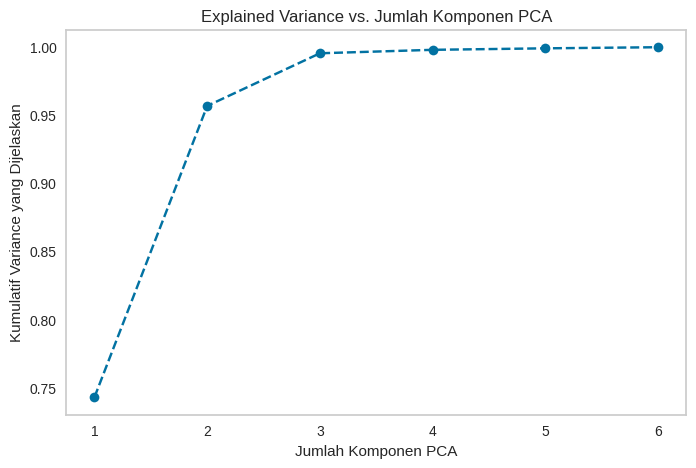

array([0.7428124 , 0.95686461, 0.99555323, 0.9980883 , 0.99918776,
       1.        ])

In [261]:
from sklearn.decomposition import PCA
# PCA
pca = PCA()
pca.fit(df_final_dropped)

# Variance explained oleh setiap komponen
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot variansi yang dijelaskan oleh tiap komponen
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Jumlah Komponen PCA")
plt.ylabel("Kumulatif Variance yang Dijelaskan")
plt.title("Explained Variance vs. Jumlah Komponen PCA")
plt.grid()
plt.show()

# Menampilkan explained variance ratio
explained_variance

In [262]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pca = PCA(n_components=2)
df_pca_final = pca.fit_transform(df_final_dropped)

# Cek hasil PCA
print(df_pca_final[:5])

[[ 2.73131592 -2.24667109]
 [-0.49722981  1.579074  ]
 [-4.31316662 -1.62205486]
 [-9.19673384 -2.82944408]
 [-8.33859263 -2.93843587]]


In [263]:
# Variance yang dijelaskan oleh setiap komponen
explained_variance = pca.explained_variance_ratio_

print("Variance yang dijelaskan oleh setiap komponen:", explained_variance)

# Kumulatif variance yang dijelaskan
cumulative_variance = np.cumsum(explained_variance)
print("Kumulatif Variance yang Dijelaskan:", cumulative_variance)

Variance yang dijelaskan oleh setiap komponen: [0.7428124  0.21405222]
Kumulatif Variance yang Dijelaskan: [0.7428124  0.95686461]


*pelatihan menggunakan data hasil feature selection*

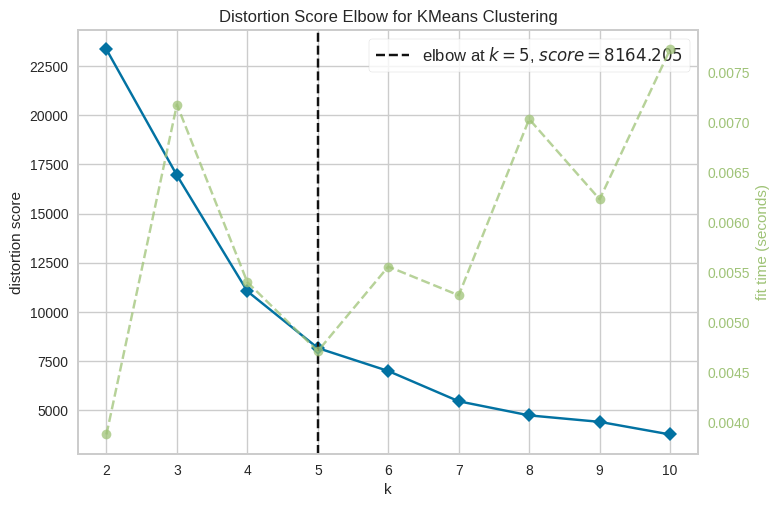

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [276]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Inisialisasi model KMeans
kmeans = KMeans(random_state=42)

# Inisialisasi visualizer dengan model KMeans dan jumlah cluster maksimum
visualizer = KElbowVisualizer(kmeans, k=(2, 11))

# Visualisasi metode Elbow
visualizer.fit(df_pca_final)
visualizer.show()

In [265]:
optimal_clusters = visualizer.elbow_value_
print(f'Jumlah Cluster Optimal berdasarkan Elbow: {optimal_clusters}')

Jumlah Cluster Optimal berdasarkan Elbow: 5


In [277]:
kmeans_optimal_fs = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal_fs.fit(df_pca_final)

# Hitung Silhouette Score untuk mengevaluasi kualitas clustering
sil_score = silhouette_score(df_pca_final, kmeans_optimal_fs.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.4825129444264303


*perbandingan hasil*

In [279]:
kmeans_optimal_ori = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal_ori.fit(df_pca)

# Hitung Silhouette Score untuk mengevaluasi kualitas clustering
sil_score_before = silhouette_score(df_pca, kmeans_optimal_ori.labels_)
print(f'Silhouette Score sebelum feature selection: {sil_score_before}')

Silhouette Score sebelum feature selection: 0.48241376479641496


In [283]:
kmeans_optimal_fs = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal_fs.fit(df_pca_final)

# Hitung Silhouette Score untuk mengevaluasi kualitas clustering
sil_score_after = silhouette_score(df_pca_final, kmeans_optimal_fs.labels_)
print(f'Silhouette Score sesuda feature selection: {sil_score_after}')

Silhouette Score sesuda feature selection: 0.4825129444264303


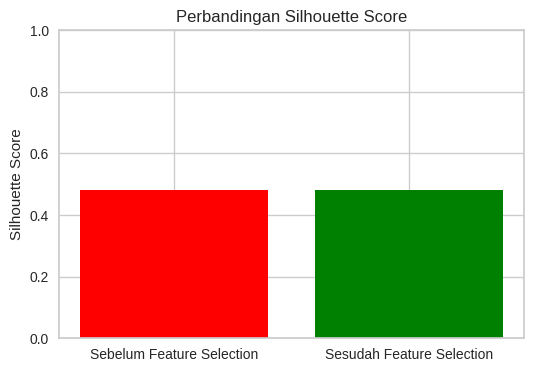

In [284]:
import matplotlib.pyplot as plt

scores = [sil_score_before, sil_score_after]
labels = ["Sebelum Feature Selection", "Sesudah Feature Selection"]

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['red', 'green'])
plt.ylabel("Silhouette Score")
plt.title("Perbandingan Silhouette Score")
plt.ylim(0, 1)
plt.show()


- tidak ditemukan perubahan yang signifikan
- akan digunakan hasil setelah seleksi fitur, karena sedikit memiliki nilai yang lebih baik

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

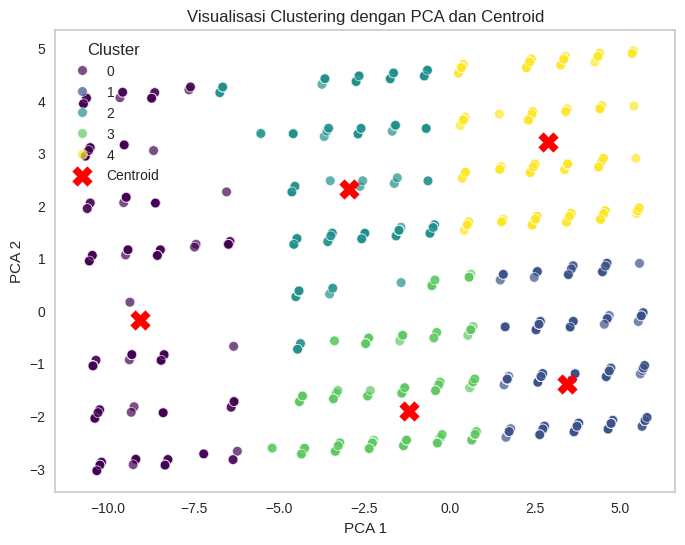

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat DataFrame baru dari hasil PCA
df_clustered = pd.DataFrame(df_pca_final, columns=["PCA1", "PCA2"])
df_clustered["Cluster"] = kmeans_optimal_fs.labels_

# Mengambil centroid dari hasil PCA
centroids = kmeans_optimal_fs.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_clustered["PCA1"], y=df_clustered["PCA2"], hue=df_clustered["Cluster"], palette="viridis", alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, c="red", label="Centroid")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisasi Clustering dengan PCA dan Centroid")
plt.legend(title="Cluster")
plt.grid()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

*inverse transform*

In [302]:
# Menyimpan hasil clustering ke dalam DataFrame
df_norm['Cluster'] = kmeans_optimal_fs.labels_

# Menampilkan beberapa baris pertama dengan label cluster
print(df_norm.head())


  Brands Colors    Rating  Selling Price  Discount Type  Memory_MB  \
0     13      0  0.545455       0.374082    0.3338    2   0.666612   
1     10      4  0.090909       0.187735    0.0000    2   0.166531   
3      6      1  0.454545       0.244878    0.0000    2   0.333225   
4      1      0  0.818182       0.997959    0.0000    3   0.333225   
5      2      0  0.272727       0.024469    0.0000    0   0.000488   

   Storage_MB  Cluster  
0    0.499996        1  
1    0.062493        2  
3    0.249994        3  
4    0.249994        0  
5    0.000053        0  


In [303]:
# Inverse transform untuk kolom yang telah dinormalisasi
df_norm[normalization_cols] = minmax_scaler.inverse_transform(df_norm[normalization_cols])
# Inversi Label Encoding untuk kolom kategorikal
for col in cat_cols:
    df_norm[col] = df_norm[col].astype(int)
    df_norm[col] = label_encoders[col].inverse_transform(df_norm[col])

In [305]:
# Menampilkan hasil setelah inversi
df_norm.head()


,Brands,Colors,Rating,Selling Price,Discount,Type,Memory_MB,Storage_MB,Cluster
0,SAMSUNG,Black,4.3,19330.0,1669.0,Mid-range,8192.0,131072.0,1
1,Nokia,Other,3.8,10199.0,0.0,Mid-range,2048.0,16384.0,2
3,Infinix,Blue,4.2,12999.0,0.0,Mid-range,4096.0,65536.0,3
4,Apple,Black,4.6,49900.0,0.0,Upper mid-range,4096.0,65536.0,0
5,GIONEE,Black,4.0,2199.0,0.0,Entry-level,8.0,16.0,0


In [315]:
# Tentukan fitur numerik dan kategorikal
numerical_cols = ["Selling Price", "Discount", "Memory_MB", "Storage_MB", "Rating"]
categorical_cols = ["Brands", "Colors", "Type"]

# Agregasi untuk fitur numerik
agg_numeric = df_norm.groupby("Cluster")[numerical_cols].agg(["mean", "min", "max"])

# Agregasi untuk fitur kategorikal 
agg_categorical = df_norm.groupby("Cluster")[categorical_cols].agg(lambda x: x.mode().iloc[0])

# Gabungkan hasil agregasi
agg_result = pd.concat([agg_numeric, agg_categorical], axis=1)

# Tampilkan hasil agregasi
agg_result


,"(Selling Price, mean)","(Selling Price, min)","(Selling Price, max)","(Discount, mean)","(Discount, min)","(Discount, max)","(Memory_MB, mean)","(Memory_MB, min)","(Memory_MB, max)","(Storage_MB, mean)","(Storage_MB, min)","(Storage_MB, max)","(Rating, mean)","(Rating, min)","(Rating, max)",Brands,Colors,Type
Cluster,,,,,,,,,,,,,,,,,,
0,19425.076389,1099.0,49999.0,376.614583,0.0,4901.0,2654.777778,8.0,8192.0,43634.895833,2.0,262144.0,4.130903,3.7,4.7,GIONEE,Black,Entry-level
1,16131.550781,1450.0,49990.0,907.393229,0.0,5000.0,4481.641927,2.0,12288.0,76562.884115,2.0,262144.0,4.292318,3.8,4.8,SAMSUNG,Black,Mid-range
2,13343.314741,3499.0,50000.0,776.681275,0.0,5000.0,3358.852590,64.0,8192.0,47471.729084,140.0,262144.0,4.088048,3.7,4.5,Infinix,Other,Mid-range
3,12893.169048,1000.0,50000.0,567.630952,0.0,5000.0,3269.428571,4.0,12288.0,51964.847619,2.0,262144.0,4.151667,3.7,4.5,OPPO,Black,Mid-range
4,18173.436754,4199.0,49999.0,1090.682578,0.0,5000.0,4929.985680,512.0,12288.0,89549.899761,4096.0,262144.0,4.281623,3.7,4.8,SAMSUNG,Other,Mid-range


### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

# interpretasi
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0: (GIONEE, Black, Entry-level)
- Harga rata-rata: 19425 (cukup tinggi)
- Discount rata-rata: 376
- Memori RAM rata-rata: 2.65 GB
- Storage rata-rata: 43.6 GB
- Karakteristik:
 - Produk entry-level dengan RAM dan storage kecil
 - Diskon kecil dibandingkan cluster lain

## Cluster 1: (SAMSUNG, Black, Mid-range)
- Harga rata-rata: 16132
- Discount rata-rata: 907
- Memori RAM rata-rata: 4.48 GB
- Storage rata-rata: 76.5 GB
- Karakteristik:
 - Produk mid-range dari Samsung
 - RAM lebih tinggi dari cluster 0
 - Diskon lebih besar

## Cluster 2 (Infinix, Other, Mid-range)

- Harga rata-rata: 13343
- Discount rata-rata: 776
- Memori RAM rata-rata: 3.35 GB
- Storage rata-rata: 47.4 GB
- Karakteristik:
 - Produk mid-range, tapi lebih murah dibandingkan cluster 1
 - Merk Infinix, mungkin lebih banyak di kelas menengah bawah

## Cluster 3 (OPPO, Black, Mid-range)

- Harga rata-rata: 12893
- Discount rata-rata: 567
- Memori RAM rata-rata: 3.26 GB
- Storage rata-rata: 51.9 GB
- Karakteristik:
 - Produk mid-range, dengan harga mirip cluster 2
 - OPPO fokus di segmen mid-range dengan harga kompetitif

## Cluster 4 (SAMSUNG, Other, Mid-range)

- Harga rata-rata: 18173
- Discount rata-rata: 1090
- Memori RAM rata-rata: 4.92 GB
- Storage rata-rata: 89.5 GB
- Karakteristik:
 - Produk mid-range premium dari Samsung
 - Diskon terbesar, mungkin strategi untuk menarik lebih banyak pelanggan

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [317]:
df_norm.to_csv("data_clustered.csv", index=False)
